---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1

Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.*

In [2]:
def answer_one():
    # Read the data
    df = pd.read_csv("fraud_data.csv")
    
    # Get the fraud data
    fraud_df = df[df["Class"] == 1]
    fraud_percent = len(fraud_df.index) / len(df.index)
    
    return fraud_percent

answer_one()

# https://brycexxx.github.io/2018/10/19/c3-assignment3/

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv("fraud_data.csv")

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Create dummy classifier and fit the model using train data
    dummy_classifier = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
    # Get the accuracy score using the test data
    _accuracy_score = dummy_classifier.score(X_test, y_test)
    
    # Make prediction using the X_test data
    prediction = dummy_classifier.predict(X_test)
    # Get the recall score using the y_test data and prediction
    _recall_score = recall_score(y_test, prediction)
    
    return (_accuracy_score, _recall_score)

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Fit the SVC classifier with train data
    svc_classifier = SVC().fit(X_train, y_train)
    # Make the prediction using X_test data
    prediction = svc_classifier.predict(X_test)
    
    # Get the scores
    # Recall score with y_test data and prediction
    _recall_score = recall_score(y_test, prediction)
    # Precision score with y_test data and prediction
    _precision_score = precision_score(y_test, prediction)
    # Accuracy score with test data
    _accuracy_score = svc_classifier.score(X_test, y_test)
    
    return (_accuracy_score, _recall_score, _precision_score)

answer_three()

/Users/yakuang/Desktop/Project/Repository/Workspace/pvenv3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{"C": 1e9, "gamma": 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    # Fit the SVC classifier using the parameters with train data
    svc_classifier = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    # Evaluate using the X_test data
    y_score = svc_classifier.decision_function(X_test)
    y_score = np.where(y_score > -220, 1, 0)
    
    # Create the confusion matrix with y_test data and y_score
    cm = confusion_matrix(y_test, y_score)
    
    return cm

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

/Users/yakuang/Desktop/Project/Repository/Workspace/pvenv3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>


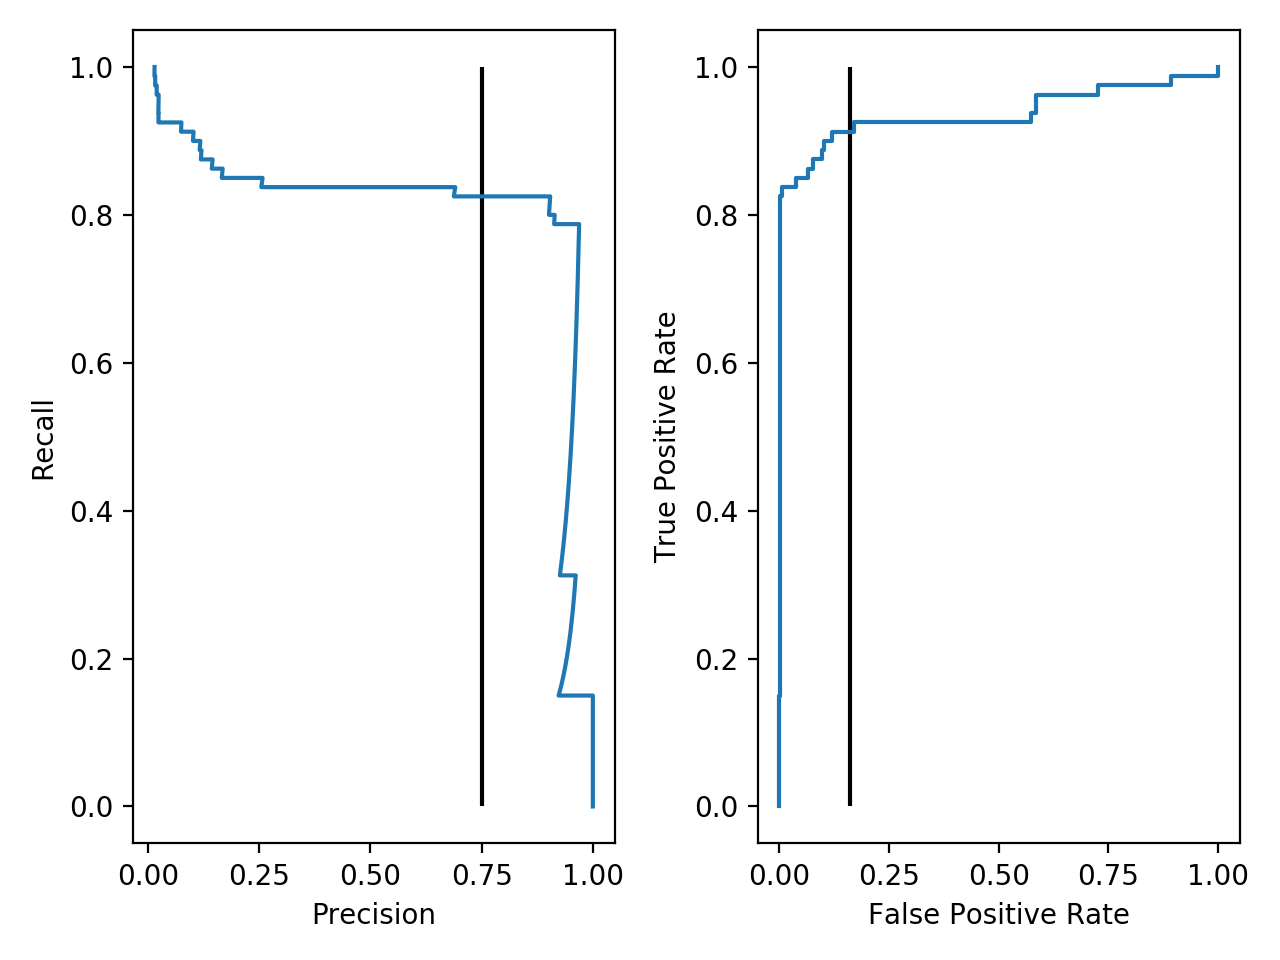

(0.825, 0.935)

In [7]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    # Fit the logistic regression using train data
    lr = LogisticRegression(solver = "lbfgs").fit(X_train, y_train)
    # Evaluate the logistic regression model using the X_test data
    y_score_lr = lr.decision_function(X_test)
    # Calculate the precision and recall curve using y_test data and y_score
    precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_score_lr)
    # Calculate the ROC curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
    
    # Calculate precision and recall value
    precision_index = np.argwhere(precision_lr == 0.75)
    recall_value = recall_lr[precision_index]
    
    # Calculate false positive and true positive value
    fpr_index = np.argwhere(fpr_lr == 0.16)
    tpr_value = tpr_lr[fpr_index]
    
    # Plot the data
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    # Precision and recall
    plt.subplot(1, 2, 1)
    plt.plot(precision_lr, recall_lr)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.vlines(0.75, 0, 1)
    # False positive and true positive
    plt.subplot(1, 2, 2)
    plt.plot(fpr_lr, tpr_lr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.vlines(0.16, 0, 1)
    
    plt.tight_layout()
    return 0.825, 0.935

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Create the logistic regression
    lr = LogisticRegression(solver = "liblinear")
    
    # Set the grid value for penalty and C
    grid_value = {"penalty": ["l1", "l2"],
                  "C": [0.01, 0.1, 1, 10, 100]}
    
    # Create the grid with parameters
    grid_lr_recall = GridSearchCV(lr, param_grid = grid_value, scoring = "recall")
    # Fit the model using train data
    grid_lr_recall.fit(X_train, y_train)
    # Get the result
    result = grid_lr_recall.cv_results_
    
    # Get the score
    test_score = np.vstack((result["split0_test_score"],
                            result["split1_test_score"],
                            result["split2_test_score"]))
    
    return test_score.mean(axis = 0).reshape(5, 2)

answer_six()

/Users/yakuang/Desktop/Project/Repository/Workspace/pvenv3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

/Users/yakuang/Desktop/Project/Repository/Workspace/pvenv3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<IPython.core.display.Javascript object>


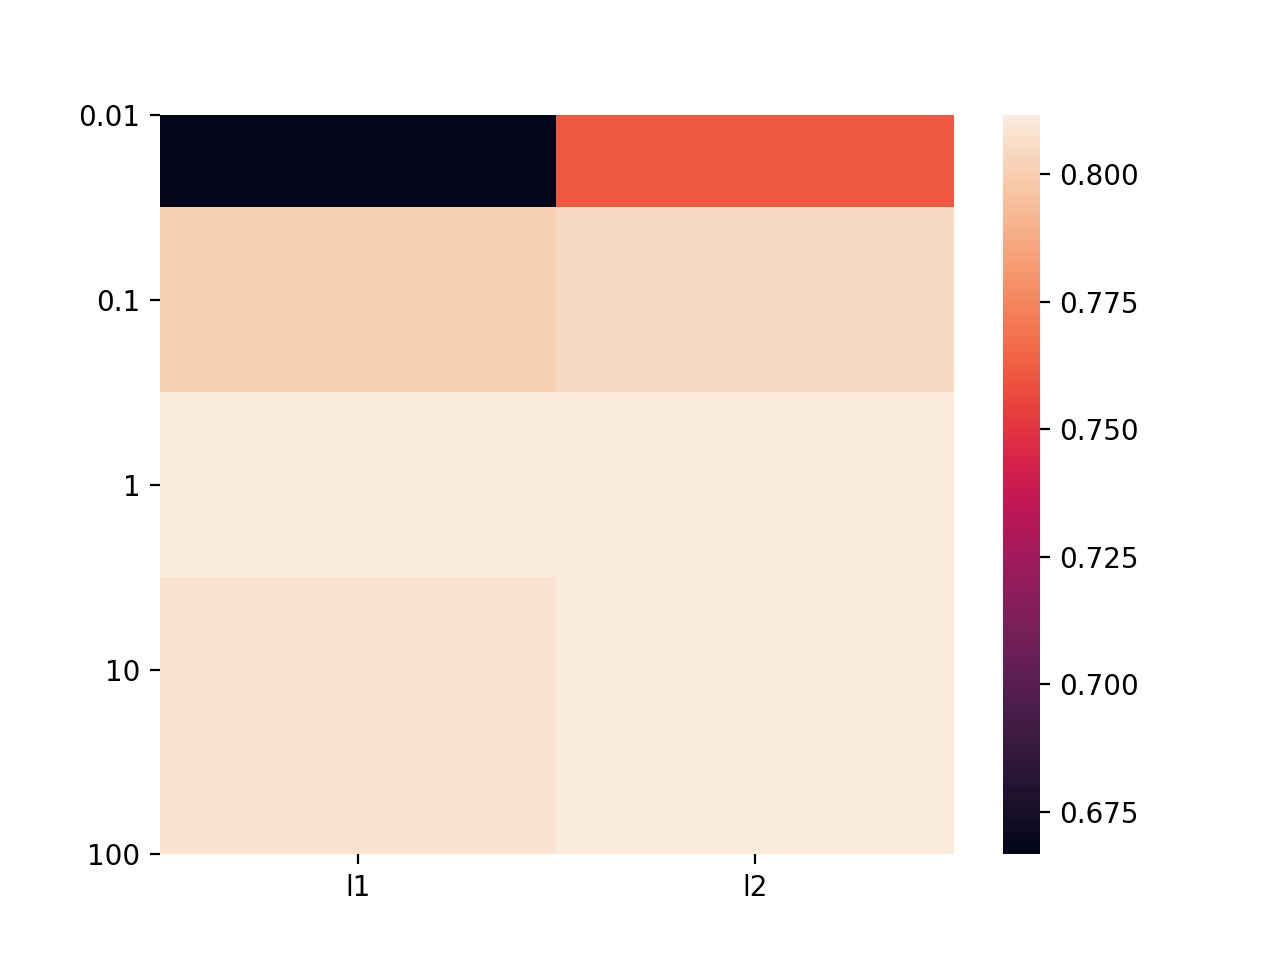

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels = ["l1", "l2"], yticklabels = [0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation = 0);

GridSearch_Heatmap(answer_six())